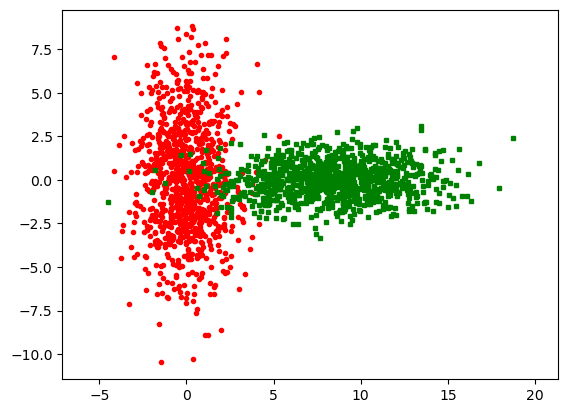

In [1]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# create some input data
# 2D Gaussian
mean1 = [0, 0]
# covariance matrix
cov1 = [[2, 0], [0, 10]]  # diagonal covariance
x1, y1 = np.random.multivariate_normal(mean1, cov1, 1000).T
mean2 = [8, 0]
cov2 = [[10, 0], [0, 1]]
x2, y2 = np.random.multivariate_normal(mean2, cov2, 1000).T

# 'ro' for red circles, 'gs' for green square, 
# markersize--Set the marker size in points
plt.plot(x1, y1, 'ro', x2, y2, 'gs', markersize=3)

# adjust plots with equal axis aspect ratios
plt.axis('equal')
plt.show()


In [2]:
# Let us give red dot a label '0' and give green square a label '1'
# for classfication
X1 = np.zeros(shape=(2, 1000))
X1[0] = x1
X1[1] = y1
X1 = X1.T

X2 = np.zeros(shape=(2, 1000))
X2[0] = x2
X2[1] = y2
X2 = X2.T

print(X1.shape)
print(X2.shape)


(1000, 2)
(1000, 2)


In [3]:
# axis = 0 means vertical
X = np.concatenate((X1, X2), axis=0)
y = np.concatenate(
    (np.zeros(shape=(1, 1000)).T, np.ones(shape=(1, 1000)).T), axis=0
)
print(X.shape)
print(y.shape)


(2000, 2)
(2000, 1)


In [4]:
# XGBoost classifier
xg_reg = xgb.XGBRegressor(
    objective='reg:logistic', 
    colsample_bytree=0.3, 
    learning_rate=0.1,
    max_depth=5, 
    n_estimators=5,
)

""""
hyper-parameter for xgboost:
`learning_rate`: step size shrinkage used to prevent overfitting. Range is [0,1]
`max_depth`: determines how deeply each tree is allowed to grow during any boosting round.
`subsample`: percentage of samples used per tree. Low value can lead to underfitting.
`colsample_bytree`: percentage of features used per tree. High value can lead to overfitting.
`n_estimators`: number of trees you want to build.
`objective`: determines the loss function to be used. `reg:linear`: linear regression,
`reg:logistic`: logistic regression, `binary:logistic`: logistic regression for binary classification, output probability
binary:logistic: logistic regression for binary classification, output probability
`gamma`: controls whether a given node will split based on the expected reduction in loss after the split. 
A higher value leads to fewer splits. Supported only for tree-based learners.
`alpha`: L1 regularization on leaf weights. A large value leads to more regularization.
`lambda`: L2 regularization on leaf weights and is smoother than L1 regularization.
"""


'"\nhyper-parameter for xgboost:\n`learning_rate`: step size shrinkage used to prevent overfitting. Range is [0,1]\n`max_depth`: determines how deeply each tree is allowed to grow during any boosting round.\n`subsample`: percentage of samples used per tree. Low value can lead to underfitting.\n`colsample_bytree`: percentage of features used per tree. High value can lead to overfitting.\n`n_estimators`: number of trees you want to build.\n`objective`: determines the loss function to be used. `reg:linear`: linear regression,\n`reg:logistic`: logistic regression, `binary:logistic`: logistic regression for binary classification, output probability\nbinary:logistic: logistic regression for binary classification, output probability\n`gamma`: controls whether a given node will split based on the expected reduction in loss after the split. \nA higher value leads to fewer splits. Supported only for tree-based learners.\n`alpha`: L1 regularization on leaf weights. A large value leads to more reg

In [6]:
from sklearn.model_selection import train_test_split 

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # Use your X and y variables here
)

# Fit data
xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)

# Convert probability to labels
for i in range(len(preds)):
    if preds[i] >= 0.5:
        preds[i] = 1
    else:
        preds[i] = 0

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.200000


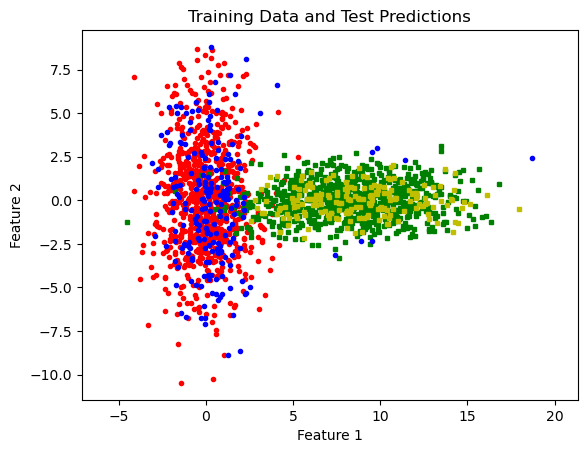

In [8]:
# 确保在绘图前已执行：
# 1. 数据拆分：X_train, X_test, y_train, y_test = train_test_split(...)
# 2. 模型训练和预测：preds = xg_reg.predict(X_test)

# plot the result
x1_train, y1_train = [], []
x2_train, y2_train = [], []
# 遍历训练集标签，分离两类样本
for i in range(len(y_train)):
    if y_train[i] == 0.0:  # 第0类
        x1_train.append(X_train[i][0])  # 特征1
        y1_train.append(X_train[i][1])  # 特征2
    else:  # 第1类
        x2_train.append(X_train[i][0])
        y2_train.append(X_train[i][1])

x1_test, y1_test = [], []
x2_test, y2_test = [], []
# 遍历测试集预测结果，分离两类预测样本
for i in range(len(preds)):
    if preds[i] == 0:  # 预测为第0类
        x1_test.append(X_test[i][0])
        y1_test.append(X_test[i][1])
    else:  # 预测为第1类
        x2_test.append(X_test[i][0])
        y2_test.append(X_test[i][1])
        
# 绘图：训练集（红圈、绿方块）+ 测试集预测（蓝圈、黄方块）
plt.plot(x1_train, y1_train, 'ro', x2_train, y2_train, 'gs',
         x1_test, y1_test, 'bo', x2_test, y2_test, 'ys', markersize=3)
plt.axis('equal')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data and Test Predictions')
plt.show()

Test Accuracy: 0.9675


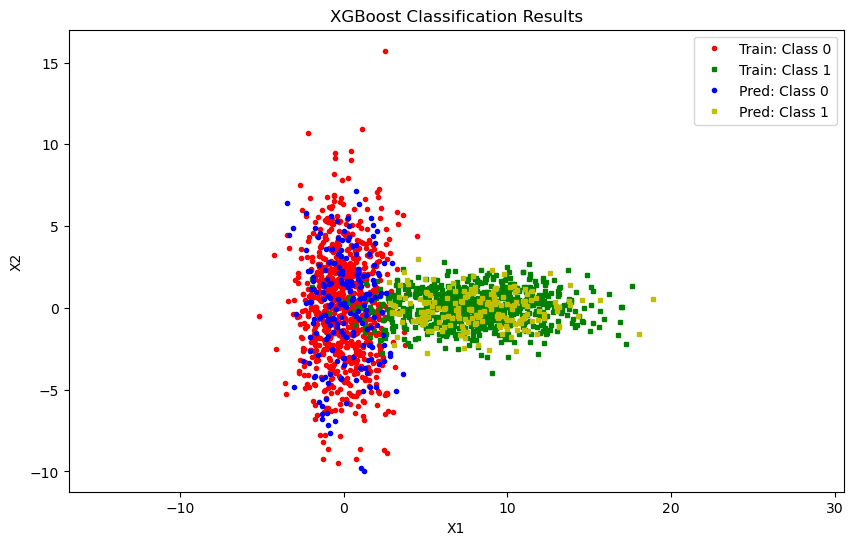

In [9]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split  # Add this for data splitting
from sklearn.metrics import accuracy_score  # Use accuracy for classification
import matplotlib.pyplot as plt

# 1. Generate input data (2D Gaussian distributions)
# Distribution 1 (label 0: red circles)
mean1 = [0, 0]
cov1 = [[2, 0], [0, 10]]  # Diagonal covariance
x1, y1 = np.random.multivariate_normal(mean1, cov1, 1000).T  # 1000 samples

# Distribution 2 (label 1: green squares)
mean2 = [8, 0]
cov2 = [[10, 0], [0, 1]]
x2, y2 = np.random.multivariate_normal(mean2, cov2, 1000).T  # 1000 samples

# 2. Organize data into features (X) and labels (y)
# Reshape to (n_samples, n_features)
X1 = np.column_stack((x1, y1))  # Shape: (1000, 2)
X2 = np.column_stack((x2, y2))  # Shape: (1000, 2)

# Combine data (total 2000 samples)
X = np.concatenate((X1, X2), axis=0)  # Shape: (2000, 2)
y = np.concatenate((np.zeros(1000), np.ones(1000)))  # Labels: 0s and 1s (shape: (2000,))

# 3. Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # Fixed random state for reproducibility
)

# 4. Define XGBoost Classifier (use classifier for classification tasks)
# Use `XGBClassifier` instead of `XGBRegressor` for classification
xg_clf = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification (outputs probabilities)
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=50,  # Increased from 5 for better performance
    random_state=42
)

# 5. Train the model
xg_clf.fit(X_train, y_train)

# 6. Make predictions
y_pred_proba = xg_clf.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert to 0/1 labels (threshold=0.5)

# 7. Evaluate performance (use accuracy for classification)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# 8. Visualize results
# Training data
plt.figure(figsize=(10, 6))
# Training points (label 0: red circles; label 1: green squares)
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 'ro', markersize=3, label='Train: Class 0')
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 'gs', markersize=3, label='Train: Class 1')

# Test predictions (label 0: blue circles; label 1: yellow squares)
plt.plot(X_test[y_pred == 0, 0], X_test[y_pred == 0, 1], 'bo', markersize=3, label='Pred: Class 0')
plt.plot(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1], 'ys', markersize=3, label='Pred: Class 1')

plt.axis('equal')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('XGBoost Classification Results')
plt.legend()
plt.show()